In [33]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [34]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

In [49]:
import scipy

In [45]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [53]:
covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'

In [4]:
score_file='../private_output/plink_score_INI50_test.sscore'
phe_file='/oak/stanford/groups/mrivas/private_data/ukbb/24983/phenotypedata/ukb9797_20170818_qt/INI50.phe'


In [60]:
covar_df = pd.read_csv(
    covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
)

In [26]:
score_df = pd.read_csv(score_file, usecols=[1,2,3,4], sep='\t')

In [27]:
phe_df = pd.read_csv(phe_file, sep='\t', usecols=[1,2], names=['IID', 'phe'])

In [28]:
merged_df = score_df.merge(
    phe_df, on='IID'
)

In [31]:
merged_df.head()

IID  NMISS_ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM  SCORE1_AVG    phe
0  1000028            27000                     5338    0.000070  176.0
1  1000034            26434                     5241    0.000082  182.0
2  1000045            27096                     5394   -0.000040  156.0
3  1000052            27034                     5370    0.000079  159.0
4  1000076            26986                     5425    0.000127  175.0

In [48]:
rsquared(
    merged_df['SCORE1_AVG'], merged_df['phe']
)

0.06094146620992523

(array([4.20000e+01, 9.36000e+02, 1.02090e+04, 5.04640e+04, 1.08954e+05,
        1.07412e+05, 4.82420e+04, 1.00300e+04, 8.70000e+02, 3.90000e+01]),
 array([-3.469690e-04, -2.719941e-04, -1.970192e-04, -1.220443e-04,
        -4.706940e-05,  2.790550e-05,  1.028804e-04,  1.778553e-04,
         2.528302e-04,  3.278051e-04,  4.027800e-04]),
 <a list of 10 Patch objects>)

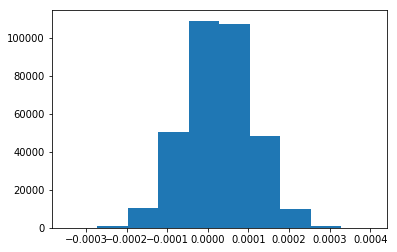

In [35]:
plt.hist(merged_df['SCORE1_AVG'])

(array([7.01000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        4.00000e+00, 2.17000e+02, 1.31479e+05, 1.97832e+05, 6.96400e+03]),
 array([ -9. ,  12.8,  34.6,  56.4,  78.2, 100. , 121.8, 143.6, 165.4,
        187.2, 209. ]),
 <a list of 10 Patch objects>)

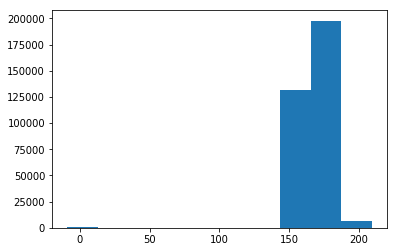

In [36]:
plt.hist(merged_df['phe'])

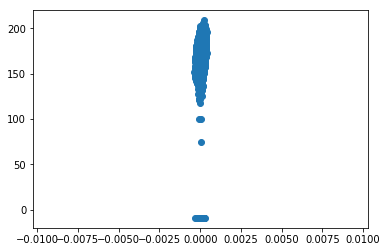

In [37]:
plt.scatter(
    merged_df['SCORE1_AVG'],
    merged_df['phe']
)

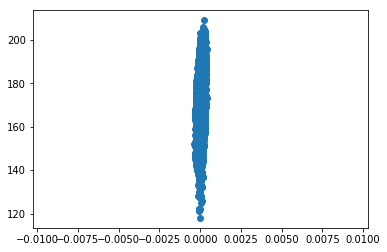

In [38]:
plt.scatter(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

In [50]:
rsquared(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

0.10784323289546859

In [61]:
merged2 = merged_df.merge(
    covar_df, on='IID'
)

In [63]:
merged2.head()

IID  NMISS_ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM  SCORE1_AVG    phe   age  \
0  1000028            27000                     5338    0.000070  176.0  54.0   
1  1000034            26434                     5241    0.000082  182.0  68.0   
2  1000045            27096                     5394   -0.000040  156.0  79.0   
3  1000052            27034                     5370    0.000079  159.0  72.0   
4  1000076            26986                     5425    0.000127  175.0  72.0   

   sex      PC1      PC2       PC3       PC4  
0    0 -13.9881  3.69742 -0.379325  2.415610  
1    1 -12.8332  2.76107 -1.569210  0.666705  
2    0 -14.0366  6.47430 -0.437916  4.497090  
3    0 -15.4658  3.81758 -0.301443 -0.635698  
4    1 -11.1046  1.52203 -1.565340  5.450450

In [64]:
from sklearn.linear_model import LinearRegression

In [67]:
X = merged2[['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']].values

In [70]:
y = np.array(merged2['phe'])

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.coef_

array([-1.63201178e-01,  1.32173668e+01,  4.01935167e-02, -4.93185741e-03,
        2.78813948e-04, -1.47628213e-01])

In [73]:
merged2['residuals'] = y - reg.predict(X)

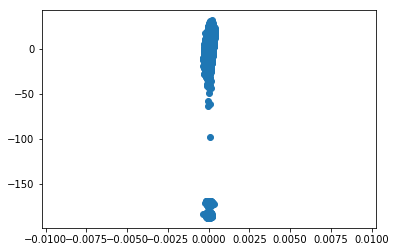

In [75]:
plt.scatter(
    merged2['SCORE1_AVG'],
    merged2['residuals']
)

In [76]:
rsquared(
    merged2['SCORE1_AVG'],
    merged2['residuals']

)

0.08529141174296834

In [82]:
full_model = LinearRegression().fit(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])
)


In [83]:
full_model.score(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])    
)

0.638325979670902